In [4]:
from google.colab import files
uploaded = files.upload()


Saving data.xlsx to data.xlsx


In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Replace 'data.xlsx' with the actual filename from your upload
df = pd.read_excel('data.xlsx')

import pandas as pd

pd.set_option('display.max_rows', 12)  # or any number you want
print(df)



           Country  Gini Coefficient (Disposable Income)  \
0    United States                                 0.395   
1   United Kingdom                                 0.375   
2            Spain                                 0.354   
3          Ireland                                 0.342   
4           France                                 0.324   
5            Japan                                 0.301   
6          Germany                                 0.283   
7           Sweden                                 0.278   
8          Denmark                                 0.258   
9           Canada                                 0.280   
10       Australia                                 0.320   
11          Norway                                 0.262   

    Incarceration Rate (per 100k)  
0                             650  
1                             200  
2                             165  
3                             168  
4                              82  
5  

In [7]:
import statsmodels.api as sm

# Define the dependent and independent variables with correct column names
X = df['Gini Coefficient (Disposable Income)']
y = df['Incarceration Rate (per 100k)']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Create and fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the model summary (this will show multiple tables)
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Incarceration Rate (per 100k)   R-squared:                       0.581
Model:                                       OLS   Adj. R-squared:                  0.540
Method:                            Least Squares   F-statistic:                     13.89
Date:                           Thu, 11 Dec 2025   Prob (F-statistic):            0.00393
Time:                                   20:33:07   Log-Likelihood:                -72.445
No. Observations:                             12   AIC:                             148.9
Df Residuals:                                 10   BIC:                             149.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.

Now that we have a `model` object, the previous `regression_table` cell will work correctly. To combine *multiple* regression result tables, you'd typically run multiple models, extract their key statistics, and then concatenate them. Let's create two hypothetical regression tables and combine them.

In [8]:
# Assuming you have a 'model1' (which we just created) and a 'model2' (hypothetical for demonstration)

# --- First Regression Table (from our current 'model') ---
regression_table1 = pd.DataFrame({
    'Coefficient': model.params,
    'Std Error': model.bse,
    't-value': model.tvalues,
    'p-value': model.pvalues
})
regression_table1 = regression_table1.add_prefix('Model 1 - ')

# --- Hypothetical Second Regression Model and Table ---
# For demonstration, let's create a dummy 'model2_results'
# In a real scenario, you would run another sm.OLS or similar model here.

# Example of dummy data for a second model's results
dummy_params = pd.Series([0.5, 15], index=['const', 'Some Other Var'])
dummy_bse = pd.Series([0.1, 5], index=['const', 'Some Other Var'])
dummy_tvalues = dummy_params / dummy_bse
dummy_pvalues = pd.Series([0.001, 0.05], index=['const', 'Some Other Var']) # Hypothetical p-values

regression_table2 = pd.DataFrame({
    'Coefficient': dummy_params,
    'Std Error': dummy_bse,
    't-value': dummy_tvalues,
    'p-value': dummy_pvalues
})
regression_table2 = regression_table2.add_prefix('Model 2 - ')

# --- Combine the two regression tables ---
# We'll use pd.concat, aligning by index (e.g., variable names)
combined_regression_table = pd.concat([regression_table1, regression_table2], axis=1)

print("\nCombined Regression Table:")
display(combined_regression_table)

# Optional: save the combined table to Excel
# combined_regression_table.to_excel('combined_regression_table.xlsx')
# print("\nCombined regression table saved to 'combined_regression_table.xlsx'")


Combined Regression Table:


,Model 1 - Coefficient,Model 1 - Std Error,Model 1 - t-value,Model 1 - p-value,Model 2 - Coefficient,Model 2 - Std Error,Model 2 - t-value,Model 2 - p-value
const,-716.314244,236.191299,-3.032772,0.012617,0.5,0.1,5.0,0.001
Gini Coefficient (Disposable Income),2774.329513,744.459685,3.726635,0.003932,NaN,NaN,NaN,NaN
Some Other Var,NaN,NaN,NaN,NaN,15.0,5.0,3.0,0.050


In [12]:
import pandas as pd

results_table = pd.DataFrame({
    "Coefficient": model.params,
    "Std. Error": model.bse,
    "t-Statistic": model.tvalues,
    "P-value": model.pvalues,
    "95% CI Lower": model.conf_int()[0],
    "95% CI Upper": model.conf_int()[1]
})

# Round for readability
results_table = results_table.round(3)

results_table.to_csv("regression_table.csv", index=True)


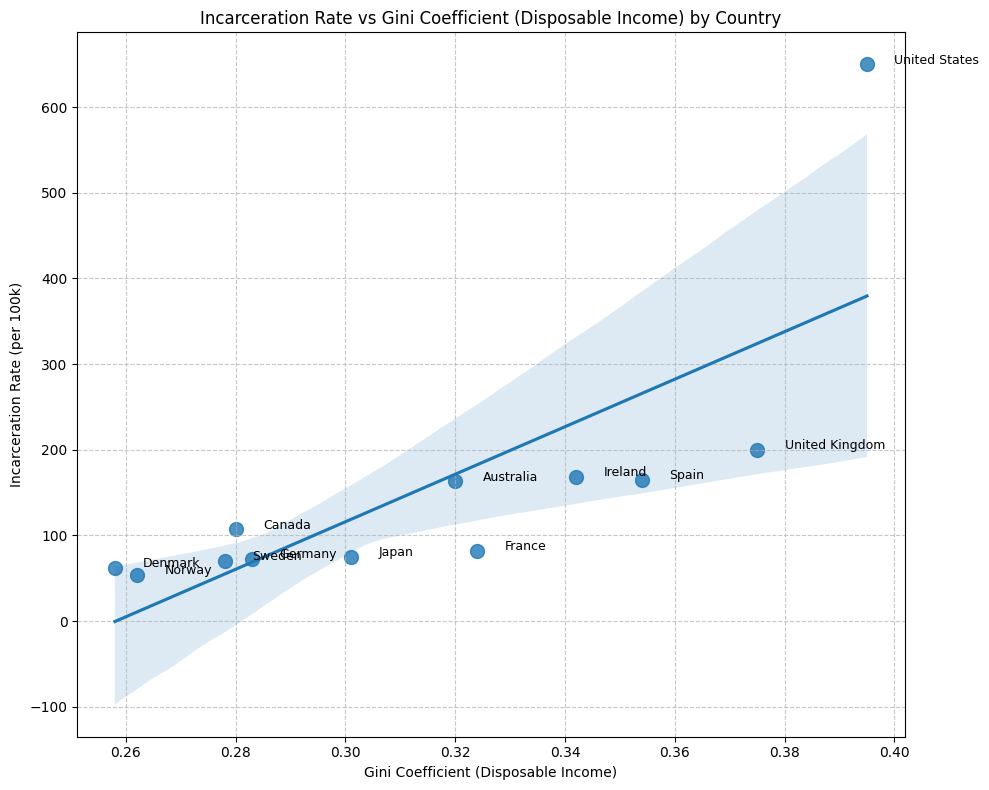

In [10]:
# Scatterplot with regression line and country labels
plt.figure(figsize=(10, 8)) # Increased figure size for better label readability
sns.regplot(x='Gini Coefficient (Disposable Income)', y='Incarceration Rate (per 100k)', data=df, fit_reg=True, scatter_kws={'s':100}) # Added fit_reg=True and adjusted scatter point size

# Add country labels to each point
for i, row in df.iterrows():
    plt.text(row['Gini Coefficient (Disposable Income)'] + 0.005, # Adjust x-offset for label positioning
             row['Incarceration Rate (per 100k)'] + 5, # Adjust y-offset for label positioning
             row['Country'],
             fontsize=9,
             ha='left',
             va='center')

plt.title('Incarceration Rate vs Gini Coefficient (Disposable Income) by Country')
plt.xlabel('Gini Coefficient (Disposable Income)')
plt.ylabel('Incarceration Rate (per 100k)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()